In [1]:
# Import Numpy, Pandas matplotlib aand seaborn packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and Cleaning Data

In [2]:
# load the data into UberRequestData dataframe
UberRequestData=pd.read_csv("C:\\Python\\Uber Request Data.csv")
UberRequestData.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [3]:
#Understand the data
UberRequestData.info()
UberRequestData.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


(6745, 6)

In [4]:
UberRequestData.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [5]:
# check if any null values
UberRequestData.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [6]:
# from the above details its clear that we will be required all the data since there is no null value for the status and request time

In [7]:
# Convert the dates columns in a single dataformat 
UberRequestData['Request timestamp']=pd.to_datetime(UberRequestData['Request timestamp'],dayfirst=True)
UberRequestData['Drop timestamp']=pd.to_datetime(UberRequestData['Drop timestamp'],dayfirst=True)

In [8]:
UberRequestData['RequestDate'] = UberRequestData['Request timestamp'].dt.date
UberRequestData['RequestHour'] = UberRequestData['Request timestamp'].dt.hour
UberRequestData['Requestdayofweek'] = UberRequestData['Request timestamp'].dt.dayofweek
UberRequestData['DropDate'] = UberRequestData['Drop timestamp'].dt.date
UberRequestData['DroptHour'] = UberRequestData['Drop timestamp'].dt.hour

In [9]:
UberRequestData.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestDate,RequestHour,Requestdayofweek,DropDate,DroptHour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11,0,2016-07-11,13.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17,0,2016-07-11,18.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,9,1,2016-07-12,9.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21,1,2016-07-12,22.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,8,2,2016-07-13,9.0


## Problem Statement

#cancellation and non-availability of cars from and to AIR PORTS


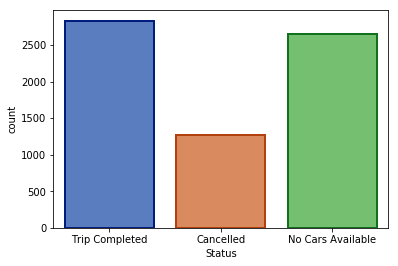

In [10]:
sns.countplot(x='Status', linewidth=2,edgecolor=sns.color_palette("dark", 3), data=UberRequestData,palette="muted")
plt.show()

In [11]:
#From the above plot its clear that the non availability of the car is more 
#now we have to identify the non availability of the car in different location 

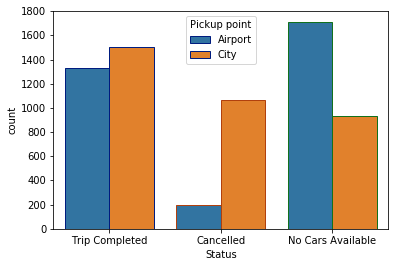

In [12]:
#Count plot for the Status for different pick up location
sns.countplot(x='Status',hue="Pickup point",linewidth=1,edgecolor=sns.color_palette("dark"), data=UberRequestData)
plt.show()


In [13]:
#The non availability of the car is higher in Airport compared to city and its higher than the complated trip count as well 
# This will lead to a high revenue loss 
# As next step of analysis we have to identify the timings in which cars are not available.

# Analysis on Time 

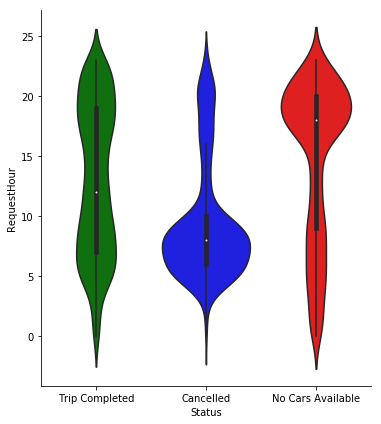

In [14]:
#Catplot  violin kind
#Plots the requests in different time plots for different Status 
sns.catplot(x="Status", y="RequestHour", data=UberRequestData,kind="violin",palette=sns.color_palette(['green', 'blue','red']),height=6, aspect=.9);
plt.show()

In [15]:
#From the above plots we can make out that the trip cancellation more in the early hours and non availability of cabs is more in night 

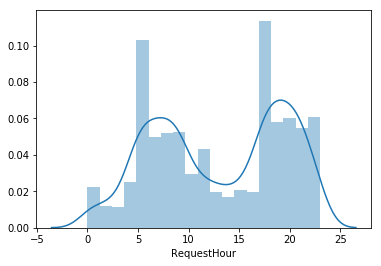

In [16]:
sns.distplot(UberRequestData.RequestHour.dropna())
plt.show()

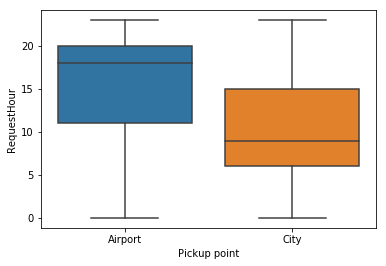

In [17]:
sns.boxplot(x='Pickup point', y='RequestHour',data=UberRequestData)

plt.show()

In [18]:
#From the above plots we can understand that 
# the cab request is more in night hours in Airport and its less in day time
# the cab request is more in day hours in City and its less in night hours

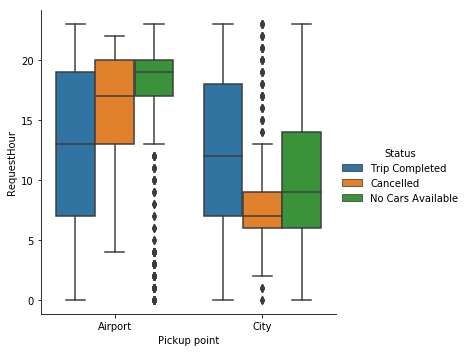

In [19]:

sns.catplot(x="Pickup point", y="RequestHour", hue="Status", kind="box", data=UberRequestData)

plt.show()


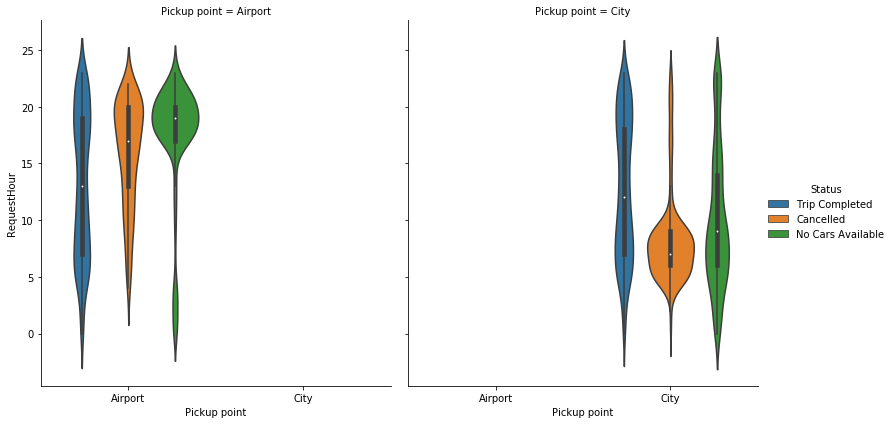

In [20]:
sns.catplot(x="Pickup point", y="RequestHour", hue="Status",kind="violin",
...                 col="Pickup point", data=UberRequestData,
...                 height=6, aspect=.9)
plt.show()

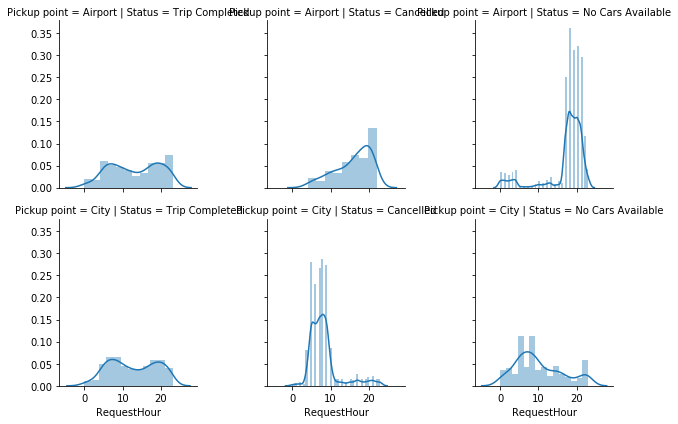

In [21]:
g = sns.FacetGrid(UberRequestData, col='Status', row='Pickup point')
g.map(sns.distplot, "RequestHour")
plt.show()

#From the above plot its clear that Non availability of the car is high at night hours in Air port and early hours in city and there is lots of cancellation in morning hours in city

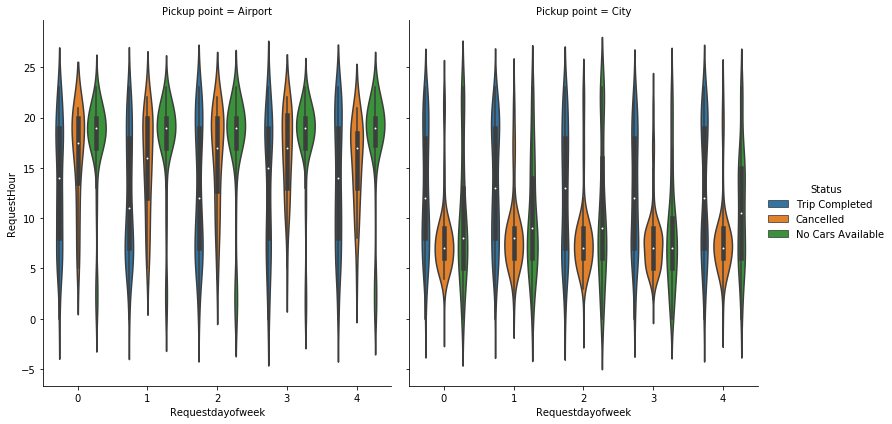

In [22]:
sns.catplot(x="Requestdayofweek", y="RequestHour", hue="Status",kind="violin",
...                 col="Pickup point", data=UberRequestData,
...                 height=6, aspect=.9)
plt.show()

# Time Analysis Findings 

1.The non availability of the car in Airport is more in night hours and interestingly at the same time number of trip completed is high in city.
2.The trip completed in both in city and in air port follows a same pattern from 5 to 24 hours
3.The number of request cancelled in city is more in morning hours and its can be noticed that the number of non availability of the car and trip completed is high in city in the same morning hours.
4.It has to be noted that the trip completed is going down to very low in 13 and 14 hours.


# Day and Hour Vise Analysis

We have already identified that the the non availability of the car in Airport is more in night hours and there is significant number of requests are cancelled in the morning in city
Now have to identify that if the pattern follows the same in all days 

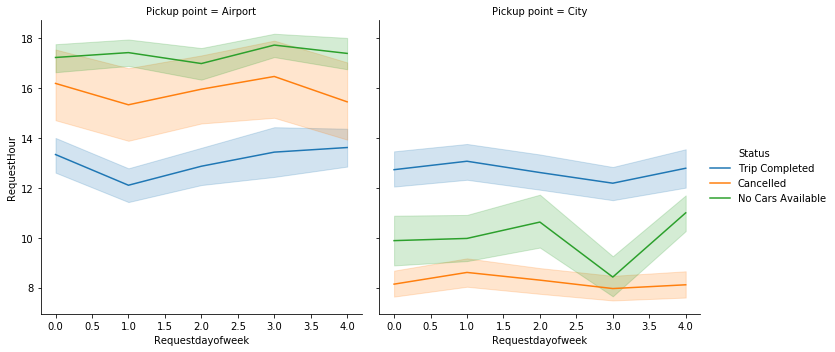

In [23]:
sns.relplot(x="Requestdayofweek", y="RequestHour", hue="Status",col="Pickup point",kind="line", data=UberRequestData)
plt.show()

### Will do a seperate analysis on Airport and city seperately to indentify the pattern


Take the pick up location as Airport and group by Requestdayofweek,Status and RequestHour and get the count of request

In [24]:
UberRequestDataFromAirPort=UberRequestData[UberRequestData['Pickup point']=='Airport']

In [25]:
UberRequestDataFromAirPort=UberRequestDataFromAirPort.groupby(['Requestdayofweek','Status','RequestHour'])['Pickup point'].count()

In [26]:
UberRequestDataFromAirPort.head()

Requestdayofweek  Status     RequestHour
0                 Cancelled  5              1
                             6              2
                             7              1
                             8              1
                             10             2
Name: Pickup point, dtype: int64

In [27]:
UberRequestDataFromAirPort=UberRequestDataFromAirPort.reset_index()

Take the pick up location as city and group by Requestdayofweek,Status and RequestHour and get the count of request

In [28]:
UberRequestDataFromCity=UberRequestData[UberRequestData['Pickup point']=='City']

In [29]:
UberRequestDataFromCity=UberRequestDataFromCity.groupby(['Requestdayofweek','Status','RequestHour'])['Pickup point'].count()

In [30]:
UberRequestDataFromCity.head()

Requestdayofweek  Status     RequestHour
0                 Cancelled  0               1
                             1               1
                             4               9
                             5              39
                             6              30
Name: Pickup point, dtype: int64

In [31]:
UberRequestDataFromCity=UberRequestDataFromCity.reset_index()

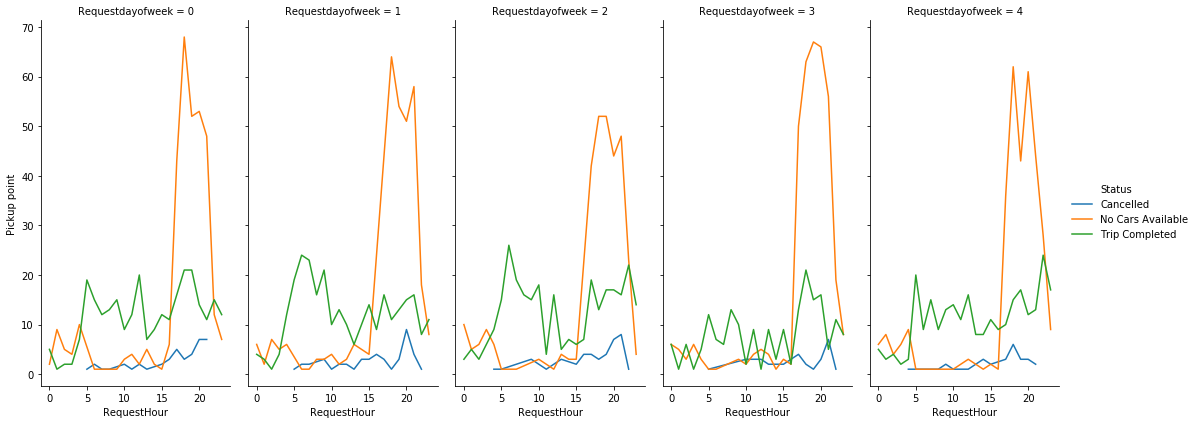

In [32]:
sns.relplot(x="RequestHour", y="Pickup point", hue="Status",col="Requestdayofweek",kind="line", data=UberRequestDataFromAirPort,height=6, aspect=.5)
plt.show()

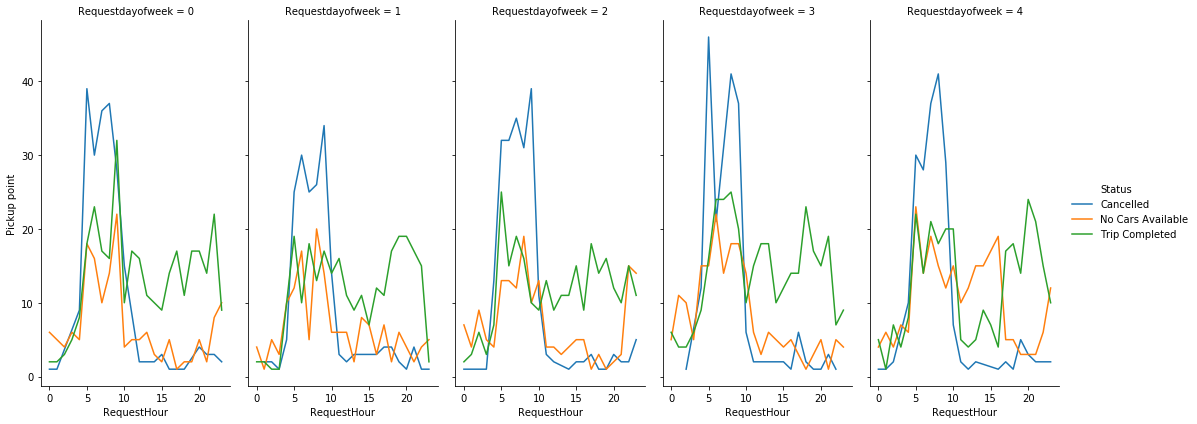

In [33]:
sns.relplot(x="RequestHour", y="Pickup point", hue="Status",col="Requestdayofweek",kind="line", data=UberRequestDataFromCity,height=6, aspect=.5)
plt.show()

# Day and Hour Vise Analysis Findings

The pattern for cab not available ,trip completed and cancelled trips is almost same in all the days

CITY
Trip Cancellation -High in morning hours and its very low in night hours.
Trip Completed -Follows almost same pattern in all hours.
Car not Available- High in morning hours.

AIRPORT
Trip Cancellation -Follows almost same pattern in all hours except mid day time its very low.
Trip Completed -There is no such significant cancellation.
Car not Available - Huge number of car not available request in night hours

# Analysis On Driver Timings

In [34]:
# We will identify the FIRST request for each driver in each day - Based on this we can make out his approximate login time

In [35]:
UberRequestDriverFirstRequest=UberRequestData.sort_values('RequestHour').groupby(['Driver id','Requestdayofweek']).first()

In [36]:
UberRequestDriverFirstRequest=UberRequestDriverFirstRequest.groupby(['Requestdayofweek','Status','RequestHour'])['Pickup point'].count()

In [37]:
UberRequestDriverFirstRequest.head(40)

Requestdayofweek  Status          RequestHour
0                 Cancelled       0               1
                                  1               1
                                  4               9
                                  5              32
                                  6              21
                                  7              18
                                  8              18
                                  9               2
                                  10              2
                                  14              1
                                  15              1
                                  16              1
                                  18              1
                  Trip Completed  0               7
                                  1               3
                                  2               5
                                  3               7
                                  4              14
                  

In [38]:
UberRequestDriverFirstRequest=UberRequestDriverFirstRequest.reset_index()

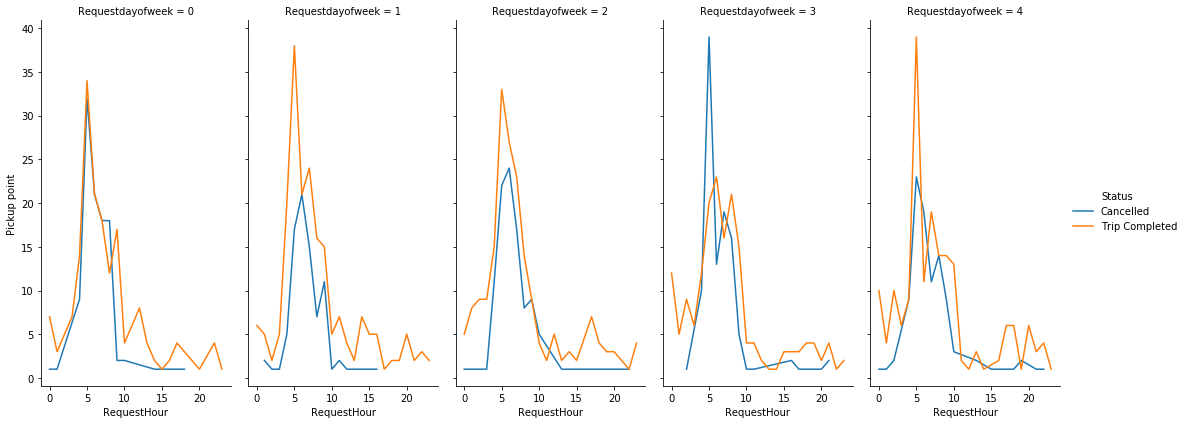

In [39]:
sns.relplot(x="RequestHour", y="Pickup point", hue="Status",col="Requestdayofweek",kind="line", data=UberRequestDriverFirstRequest,height=6, aspect=.5)
plt.ylabel("Count of Drivers")
plt.show()

In [40]:
# We will identify the LAST request for each driver in each day - Based on this we can make out his approximate log out time

In [41]:
UberRequestDriverLastRequest=UberRequestData.sort_values('RequestHour').groupby(['Driver id','Requestdayofweek']).last()

In [42]:
UberRequestDriverLastRequest=UberRequestDriverLastRequest.groupby(['Requestdayofweek','Status','RequestHour'])['Pickup point'].count()

In [43]:
UberRequestDriverLastRequest=UberRequestDriverLastRequest.reset_index()

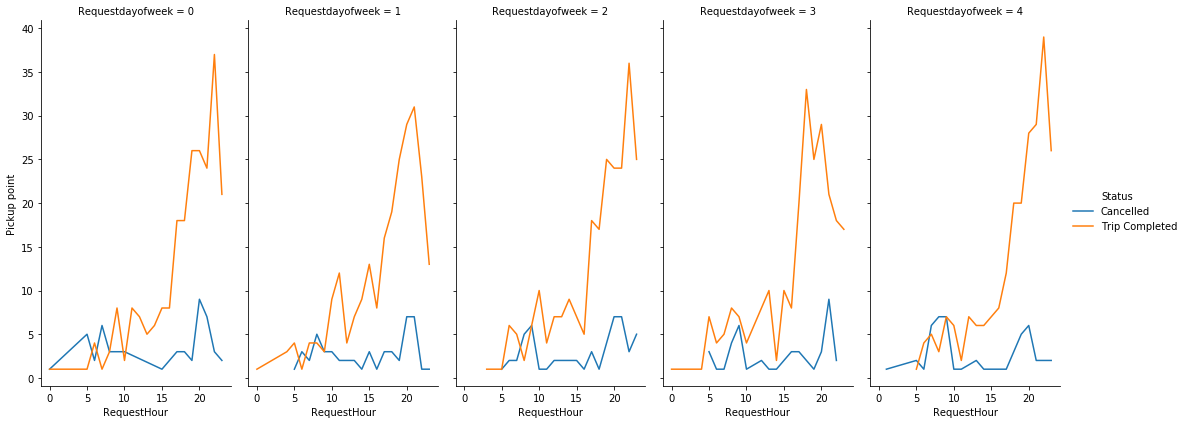

In [44]:
sns.relplot(x="RequestHour", y="Pickup point", hue="Status",col="Requestdayofweek",kind="line", data=UberRequestDriverLastRequest,height=6, aspect=.5)
plt.show()

# Analysis On Driver Timings findings

In [45]:
#Most of the drivers are in morning shift or we can say that 4 am to 8 am is their starting time.
#Most of the drivers will wind up their duty 9 pm to 10 pm 


# Analysis On Driver Login Location

In [46]:
#We can identify the driver login location based on his first trip request location

In [47]:
UberRequestDriverLoginLocation=UberRequestData.sort_values('RequestHour').groupby(['Driver id','Requestdayofweek']).first()

In [48]:
UberRequestDriverLoginLocation=UberRequestDriverLoginLocation.reset_index()

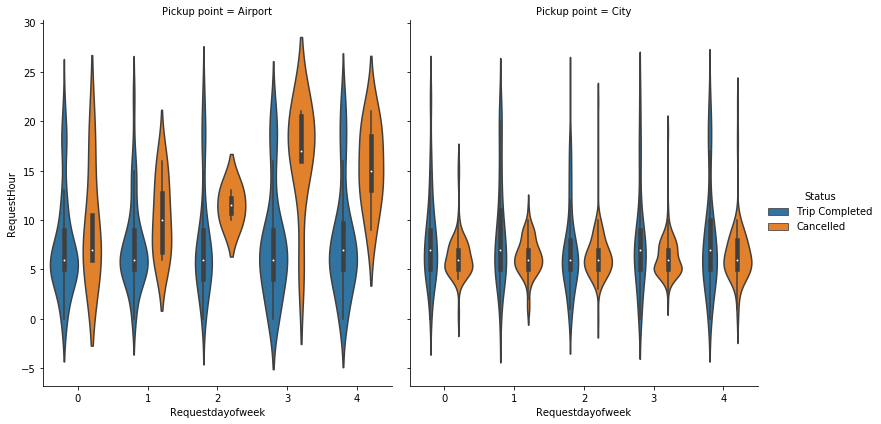

In [49]:
sns.catplot(x="Requestdayofweek", y="RequestHour", hue="Status",kind="violin",
...                 col="Pickup point", data=UberRequestDriverLoginLocation,
...                 height=6, aspect=.9)
plt.show()

# Analysis On Driver Login Location -Findings

In [50]:
#From the plot its clear that almost equal number of drivers are login in from the city and air port ,but most of the login are in early morning.
#Whoever login from city they are trying to cancel their first trip itself
